# Single Circular Linked List (SCLL) in Python
A **Single Circular Linked List** is a linked list where:
- Each node has `value` and `next` pointers.
- The last node points back to the first node (`head`), forming a circle.
- Supports operations like append, prepend, traverse, insert, delete, search, etc.


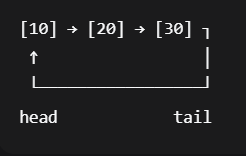

# 1. Node class

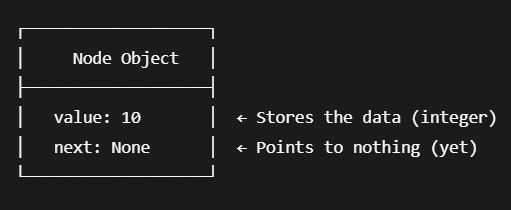

In [54]:
class Node:
    def __init__(self, value):
        self.value = value
        self.next = None

    def __str__(self):
        return str(self.value)    
        

Each node in the list has:

value → stores the data.

next → points to the next node.

__str__ is for printing the node's value easily.

# 2. Circular Single Linked List class

In [55]:
class CSLinkedList:
    def __init__(self):
        self.head = None
        self.tail = None
        self.length = 0

In [56]:
class CSLinkedList:
    def __init__(self, value):
        new_node = Node(value) #10
        new_node.next = new_node
        self.head = new_node #10
        self.tail = new_node #10
        self.length = 1

head → first node in the list.

tail → last node in the list (important for circular linking).

length → number of nodes in the list.

# String representation

head → [10] → [20] → [30] → [40] → [50] → [10] (back to head)   
tail → [50]

| Iteration | `temp_node` (address) | `temp_node.value` | Result (before)              | Result (after)                 | `temp_node.next` → | Check `temp_node.next == head`? | Action                |
| --------- | --------------------- | ----------------- | ---------------------------- | ------------------------------ | ------------------ | ------------------------------- | --------------------- |
| 1         | `[10]`                | 10                | `""`                         | `"10"`                         | `[20]`             | `[20] == [10]` → ❌              | Add `" -> "`          |
| 2         | `[20]`                | 20                | `"10 -> "`                   | `"10 -> 20"`                   | `[30]`             | `[30] == [10]` → ❌              | Add `" -> "`          |
| 3         | `[30]`                | 30                | `"10 -> 20 -> "`             | `"10 -> 20 -> 30"`             | `[40]`             | `[40] == [10]` → ❌              | Add `" -> "`          |
| 4         | `[40]`                | 40                | `"10 -> 20 -> 30 -> "`       | `"10 -> 20 -> 30 -> 40"`       | `[50]`             | `[50] == [10]` → ❌              | Add `" -> "`          |
| 5         | `[50]`                | 50                | `"10 -> 20 -> 30 -> 40 -> "` | `"10 -> 20 -> 30 -> 40 -> 50"` | `[10]`             | `[10] == [10]` → ✅              | **BREAK** (stop loop) |


In [57]:
def __str__(self):
    temp_node = self.head #10
    result = '' #"10"
    while temp_node is not None:
        result +=str(temp_node.value) # 10, 20, 30
        temp_node = temp_node.next #20 , 30
        if temp_node == self.head:
            break
        result += ' -> '
    return result    

Prints the list like: 10 -> 20 -> 30.

Stops when it loops back to the head (circular condition).

# 3. Adding nodes

### Append

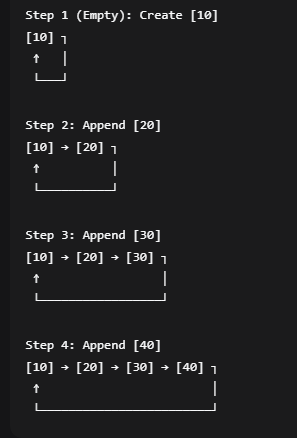

List = 10 → 20 → 30 → ... (circular)  
tail = 30  
head = 10  
new_node = 99

| Step | Code Line                   | self.tail | self.tail.next | new_node.next | Explanation                                 |
| ---- | --------------------------- | --------- | -------------- | ------------- | ------------------------------------------- |
| 0    | Start                       | 30        | 10             | -             | Before insertion: circular link 30 → 10     |
| 1    | `self.tail.next = new_node` | 30        | 99             | -             | Old tail (30) now points to new node        |
| 2    | `new_node.next = self.head` | 30        | 99             | 10            | New node points back to head (keeps circle) |
| 3    | `self.tail = new_node`      | 99        | 99             | 10            | Update tail to new node                     |
| 4    | `self.length += 1`          | 99        | 99             | 10            | Length increased                            |


In [58]:
def append(self, value):
    new_node = Node(value) #10
    if self.length == 0:
        self.head = new_node #10
        self.tail = new_node #10
        new_node.next = new_node
    else:
        self.tail.next = new_node #30.next =99
        new_node.next = self.head  #10  
        #10 → 20 → 30 →99
        self.tail = new_node #99
        self.length +=1


Adds a node at the end.

Updates tail and ensures the list remains circular

### Prepend

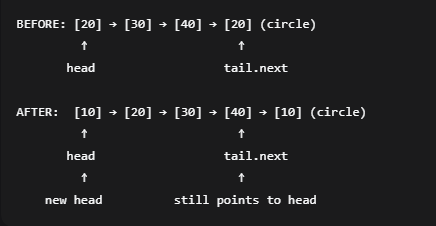

10 → 20 → 30 → back to 10   (head = 10, tail = 30)


| Step | Operation                   | `new_node` | `head` Before | `tail.next` Before | `head` After | `new_node.next` After | `tail.next` After | Explanation                                  |
| ---- | --------------------------- | ---------- | ------------- | ------------------ | ------------ | --------------------- | ----------------- | -------------------------------------------- |
| 1    | `new_node.next = self.head` | 5          | 10            | 10                 | 10           | 10                    | 10                | New node points to old head                  |
| 2    | `self.head = new_node`      | 5          | 10            | 10                 | 5            | 10                    | 10                | Head updated to new node                     |
| 3    | `self.tail.next = new_node` | 5          | 5             | 10                 | 5            | 10                    | 5                 | Tail now points to new head to keep circular |
| 4    | `self.length += 1`          | 5          | —             | —                  | —            | —                     | —                 | Length increased                             |


In [59]:
def prepend(self, value):
    new_node = Node(value)
    if self.length == 0:
        self.head = new_node #10
        self.tail = new_node #10
        new_node.next = new_node

    else:
          new_node.next = self.head 
          self.head =new_node 

          self.tail.next = new_node
    self.length +=1      

Adds a node at the beginning.

Updates the head and ensures the circular link with tail.

### Insert at index

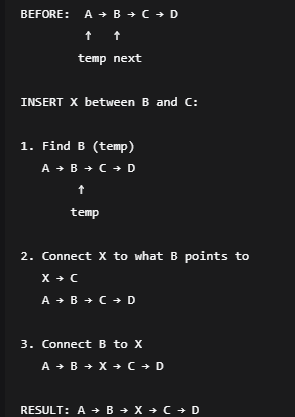

List = 10 → 20 → 30 → ... (circular)  
index = 2, so index-1 = 1   
new_node = 99  

o/p=> 10 → 20 → 99 → 30 → ...


| Step | Code Line                                          | temp_node | temp_node.next | new_node.next | Explanation            |
| ---- | -------------------------------------------------- | --------- | -------------- | ------------- | ---------------------- |
| 0    | `temp_node = self.head`                            | 10        | 20             | -             | Start at head          |
| 1    | Loop Start: `for _ in range(index-1)` (`range(1)`) | 10        | 20             | -             | Loop will run once     |
| 2    | Iteration 1: `temp_node = temp_node.next`          | 20        | 30             | -             | Move temp_node forward |
| 3    | `new_node.next = temp_node.next`                   | 20        | 30             | 30            | New node points to 30  |
| 4    | `temp_node.next = new_node`                        | 20        | 99             | 30            | Link 20 → 99           |
| 5    | `self.length += 1`                                 | -         | -              | -             | Increase list length   |


In [60]:
def insert(self, index, value):
    #Boundary check
    if index < 0 or index > self.length: 
        raise Exception("Index out of range")
    #create new node
    new_node = Node(value)
    
    # insert at beginning
    if index == 0:
        if self.length == 0:
            self.head = new_node #10
            self.tail = new_node #10
            new_node.next = new_node
        else:
            new_node.next = self.head    #10->
            self.head = new_node #10
            self.tail.next = new_node
    #insert at end
    elif index == self.length:
        #10->20->30->99
        self.tail.next = new_node #99
        new_node.next = self.head
        #99.next = 10
        self.tail  = new_node #99

    #insert in middle
    else: 
        temp_node = self.head #10
        for _ in range(index-1): #1
            temp_node = temp_node.next #20
        new_node.next = temp_node.next    #99.next =20
        #10->20->99->30
        temp_node.next = new_node
    self.length +=1    

Adds a node at a specific index.

Handles three cases:

Insert at beginning

Insert at end

Insert in middle

# 4. Traversal

head = 10

List: 10 → 20 → 30 → 10

| Step | current.value (before print) | Printed?            | current = current.next | Check `current == head` | Loop Action    |
| ---- | ---------------------------- | ------------------- | ---------------------- | ----------------------- | -------------- |
| 1    | 10                           | Yes → prints **10** | current → 20           | No                      | continue       |
| 2    | 20                           | Yes → prints **20** | current → 30           | No                      | continue       |
| 3    | 30                           | Yes → prints **30** | current → 10           | Yes (`10 == head`)      | **break loop** |


In [61]:
def traverse(self):
    if not self.head: 
        return
    current = self.head #10
    while current is not None:
        print(current.value)  #10,20,30
        current = current.next #20,10
        if current == self.head:
            break
        y

Prints all nodes starting from head.

Stops when the list loops back to head.

# 5. Searching

10 → 20 → 30 → back to 10  
head = 10  
tail = 30  
  
search(20)

| Step | current.value | Check `value == target` | Move to next | Special check |
| ---- | ------------- | ----------------------- | ------------ | ------------- |
| 1    | 10            | 10 == 20 → ❌            | move → 20    | not head      |
| 2    | 20            | 20 == 20 → ✅            | return True  | —             |


In [62]:
def search(self, target):
    current = self.head
    while current is not None:
        if current.value == target:
            return True
        current = current.next #20
        if current == self.head:
            break
    return False   

Returns index of the target if found, otherwise -1.

Stops when it loops back to the head

# 6. Access and update

get → returns node at index.

set_value → updates value of node at index.

index: 0     1     2  
nodes: 10 → 20 → 30 → back to 10  
head = 10  
tail = 30  
length = 3  


get(1)
| Step | Code Line                              | Explanation              | current |
| ---- | -------------------------------------- | ------------------------ | ------- |
| 1    | `index == -1`                          | false → skip             | —       |
| 2    | check invalid range                    | 1 is valid               | —       |
| 3    | `current = self.head`                  | current starts at head   | 10      |
| 4    | Loop start `range(index)` → `range(1)` | loop will run **1 time** | 10      |
| 5    | Inside loop: `current = current.next`  | move to next node        | 20      |
| 6    | Loop ends                              | return current           | 20      |


Index:   0     1     2   
Nodes:  10 → 20 → 30 → (back to 10)


set_value(1, 99) → means change index 1 (20) to 99

| **Step** | **What Happens**                        | **Explanation**                 |
| -------- | --------------------------------------- | ------------------------------- |
| 1        | `temp = self.get(index)`                | Calls `get(1)`                  |
| 2        | `get(1)` returns node with value **20** | Because at index 1 → node is 20 |
| 3        | `if temp:` → True                       | Because node exists             |
| 4        | `temp.value = value`                    | 20 becomes **99**               |
| 5        | `return True`                           | Value updated successfully      |


Before:   
10 → 20 → 30 → (back to 10)

After calling set_value(1, 99)  
10 → 99 → 30 → (back to 10)

In [63]:
def get(self, index):
    if index == -1:
        return self.tail
    elif index < -1 or index >= self.length:
        return None
    current = self.head #10
    for _ in range(index):#1
        current = current.next#20
        return current #20
    
    def set_value(self, index, value):
        temp = self.get(index) #1
        if temp:
            temp.value = value #temp.20= 99
            return True
        return False

# 7. Removing nodes
Pop first

10 → 20 → 30 → back to 10
(head = 10, tail = 30)


| Step | Operation                    | `head` Before | `tail.next` Before | `popped_node` | `head` After | `tail.next` After | `popped_node.next` After | Explanation                         |
| ---- | ---------------------------- | ------------- | ------------------ | ------------- | ------------ | ----------------- | ------------------------ | ----------------------------------- |
| 1    | `self.head = self.head.next` | 10            | 10                 | 10            | 20           | 10                | 10                       | Move head to next node              |
| 2    | `self.tail.next = self.head` | 20            | 10                 | 10            | 20           | 20                | 10                       | Update circle: tail.next → new head |
| 3    | `popped_node.next = None`    | 20            | 20                 | 10            | 20           | 20                | None                     | Remove link from popped node        |
| 4    | `self.length -= 1`           | —             | —                  | 10            | —            | —                 | —                        | Length decreases                    |


In [64]:
def pop_first(self):
    if self.length == 0:
        return None
    popped_node = self.head #10
    if self.length == 1:
        self.head = None
        self.tail = None
    else:
        self.head = self.head.next
        #head =20
        self.tail.next = self.head  
        self.tail.next = self.head 
        popped_node.next = None
    self.length -=1
    return popped_node    


### Removes the last node

10 → 20 → 30 → back to 10  
head = 10  
tail = 30  
length = 3


| Step | Code Line                        | Explanation                                              | temp           | tail | popped_node        |
| ---- | -------------------------------- | -------------------------------------------------------- | -------------- | ---- | ------------------ |
| 1    | `temp = self.head`               | temp is set to the head node                             | temp = 10      | 30   | 30                 |
| 2    | `while temp.next != self.tail`   | Check: 10.next = 20, not equal to tail (30) → enter loop | temp = 10      | 30   | 30                 |
| 3    | Inside loop → `temp = temp.next` | Move to next node                                        | temp = 20      | 30   | 30                 |
| 4    | Loop check again                 | 20.next = 30 → equals tail → exit loop                   | temp = 20      | 30   | 30                 |
| 5    | `temp.next = self.head`          | Make new tail point to head to keep circular structure   | temp.next = 10 | 30   | 30                 |
| 6    | `self.tail = temp`               | Update tail to second last node                          | tail = 20      | 20   | 30                 |
| 7    | `popped_node.next = None`        | Remove popped node’s circular link                       | temp = 20      | 20   | popped → next=None |
| 8    | `self.length -= 1`               | Reduce length (3 → 2)                                    | temp = 20      | 20   | 30                 |
| 9    | `return popped_node`             | Return the removed node                                  | -              | -    | 30                 |


In [65]:
def pop(self):
    if self.length == 0:
        return None
    popped_node = self.tail #30
    if self.length == 1:
        self.head = None
        self.tail = None
    else:
        temp = self.head #10
        while temp.next != self.tail: #20!=30
            temp = temp.next #20
        temp.next = self.head 
        self.tail = temp
    popped_node.next = None    
    self.length -= 1
    return popped_node  

## Remove by index

### Remove From Middle
A → B → C → (back to A)    
head = A   
tail = C   
length = 3   

| Step | Code Line                           | Variable Values                   | List State (Circular) | Explanation                                |
| ---- | ----------------------------------- | --------------------------------- | --------------------- | ------------------------------------------ |
| 1    | `prev_node = self.get(index - 1)`   | index=1 → index-1=0 → prev_node=A | A → B → C → A         | Node before the one we remove              |
| 2    | `popped_node = prev_node.next`      | popped_node = B                   | A → **B** → C → A     | B is the node to remove                    |
| 3    | `prev_node.next = popped_node.next` | A.next = C                        | A → C → A             | B is skipped (removed from chain)          |
| 4    | `if popped_node == self.tail:`      | B == C → FALSE                    | A → C → A             | Removed node is NOT tail, skip tail update |
| 5    | `popped_node.next = None`           | B.next = None                     | A → C → A             | Fully disconnect removed node              |
| 6    | `self.length -= 1`                  | length = 2                        | A → C → A             | Update length                              |

A → C → (back to A)   
head = A   , tail = C , length = 2 , Node removed: B


In [66]:
def remove(self, index):
    #invalid index
    if index <-1 or index >=self.length:
        return None
    #remove 1st node
    if index == 0:
        return self.pop_first()
    #remove last node
    if index == -1 or index == self.length -1:
        return self.pop()
    #remove middle elements
    prev_node = self.get(index-1) #0
    popped_node = prev_node.next #B

    #skip the node to remove
    prev_node.next = popped_node.next
    # A.next = c
    if popped_node == self.tail: #B==C
        self.tail = prev_node
        self.tail.next = self.head
    popped_node.next =None
    self.length -= 1
    return popped_node    


Removes node at a specific index.

Handles first, last, and middle cases

# 8. Delete all nodes

In [ ]:

def delete_all(self):
    if self.head is None:
        return
    self.tail.next = None 
    self.head= None
    self.tail =None
    self.length = 0
    

Clears the entire list and breaks the circular link.

# 9. Example usage

In [ ]:
linked_list = CSLinkedList()
linked_list.append(10)
linked_list.insert(0,20)
linked_list.insert(1,30)
linked_list.insert(2,40)
linked_list.insert(3,50)
linked_list.set_value(-1,100)


TypeError: CSLinkedList.__init__() missing 1 required positional argument: 'value'

In [ ]:
class Node:
    def __init__(self, value):
        self.value = value
        self.next = None
    
    def __str__(self):
        return str(self.value)


class CSLinkedList:
    def __init__(self):
        self.head = None
        self.tail = None
        self.length = 0

    # ---------------------------------------------------
    # STRING REPRESENTATION
    # ---------------------------------------------------
    def __str__(self):
        if self.length == 0:
            return "Empty Circular Linked List"

        current = self.head
        result = ""
        while True:
            result += str(current.value)
            current = current.next
            if current == self.head:
                break
            result += " -> "
        result += " (back to head)"
        return result

    # ---------------------------------------------------
    # APPEND (ADD LAST)
    # ---------------------------------------------------
    def append(self, value):
        new_node = Node(value)
        if self.length == 0:
            self.head = new_node
            self.tail = new_node
            new_node.next = new_node  # circular
        else:
            self.tail.next = new_node
            new_node.next = self.head
            self.tail = new_node

        self.length += 1

    # ---------------------------------------------------
    # PREPEND (ADD FIRST)
    # ---------------------------------------------------
    def prepend(self, value):
        new_node = Node(value)
        if self.length == 0:
            self.head = new_node
            self.tail = new_node
            new_node.next = new_node
        else:
            new_node.next = self.head
            self.head = new_node
            self.tail.next = new_node

        self.length += 1

    # ---------------------------------------------------
    # INSERT AT INDEX
    # ---------------------------------------------------
    def insert(self, index, value):
        if index < 0 or index > self.length:
            print("❌ Invalid index")
            return False
        
        if index == 0:
            self.prepend(value)
            return True
        
        if index == self.length:
            self.append(value)
            return True
        
        new_node = Node(value)
        temp = self.head
        for _ in range(index - 1):
            temp = temp.next

        new_node.next = temp.next
        temp.next = new_node
        self.length += 1
        return True

    # ---------------------------------------------------
    # GET NODE
    # ---------------------------------------------------
    def get(self, index):
        if index < 0 or index >= self.length:
            return None

        current = self.head
        for _ in range(index):
            current = current.next
        return current

    # ---------------------------------------------------
    # SET VALUE
    # ---------------------------------------------------
    def set_value(self, index, value):
        temp = self.get(index)
        if temp:
            temp.value = value
            return True
        return False

    # ---------------------------------------------------
    # SEARCH
    # ---------------------------------------------------
    def search(self, target):
        if self.length == 0:
            return False

        current = self.head
        while True:
            if current.value == target:
                return True
            current = current.next
            if current == self.head:
                break
        return False

    # ---------------------------------------------------
    # TRAVERSE
    # ---------------------------------------------------
    def traverse(self):
        if self.length == 0:
            print("List is empty")
            return
        
        current = self.head
        while True:
            print(current.value)
            current = current.next
            if current == self.head:
                break

    # ---------------------------------------------------
    # POP FIRST
    # ---------------------------------------------------
    def pop_first(self):
        if self.length == 0:
            return None
        
        popped = self.head

        if self.length == 1:
            self.head = None
            self.tail = None
        else:
            self.head = self.head.next
            self.tail.next = self.head
        
        popped.next = None
        self.length -= 1
        return popped

    # ---------------------------------------------------
    # POP LAST
    # ---------------------------------------------------
    def pop(self):
        if self.length == 0:
            return None
        
        popped = self.tail
        
        if self.length == 1:
            self.head = None
            self.tail = None
        else:
            temp = self.head
            while temp.next != self.tail:
                temp = temp.next
            temp.next = self.head
            self.tail = temp
        
        popped.next = None
        self.length -= 1
        return popped

    # ---------------------------------------------------
    # REMOVE BY INDEX
    # ---------------------------------------------------
    def remove(self, index):
        if index < 0 or index >= self.length:
            return None
        
        if index == 0:
            return self.pop_first()
        
        if index == self.length - 1:
            return self.pop()
        
        prev = self.get(index - 1)
        popped = prev.next

        prev.next = popped.next
        popped.next = None
        self.length -= 1
        return popped

    # ---------------------------------------------------
    # DELETE ALL
    # ---------------------------------------------------
    def delete_all(self):
        self.tail.next = None
        self.head = None
        self.tail = None
        self.length = 0


# =======================================================
#               🎉 TESTING THE CSLL CLASS
# =======================================================

if __name__ == "__main__":
    ll = CSLinkedList()

    print("\n--- Adding Elements ---")
    ll.append(10)
    ll.append(20)
    ll.append(30)
    ll.prepend(5)
    ll.insert(2, 99)

    print("\nCircular Linked List:")
    print(ll)

    print("\n--- Traversal ---")
    ll.traverse()

    print("\nSearch 20:", ll.search(20))
    print("Search 100:", ll.search(100))

    print("\nPop First:", ll.pop_first())
    print("After pop_first:", ll)

    print("\nPop Last:", ll.pop())
    print("After pop:", ll)

    print("\nRemove index 1:", ll.remove(1))
    print("After remove:", ll)

    print("\nDeleting all...")
    ll.delete_all()
    print(ll)



--- Adding Elements ---

Circular Linked List:
5 -> 10 -> 99 -> 20 -> 30 (back to head)

--- Traversal ---
5
10
99
20
30

Search 20: True
Search 100: False

Pop First: 5
After pop_first: 10 -> 99 -> 20 -> 30 (back to head)

Pop Last: 30
After pop: 10 -> 99 -> 20 (back to head)

Remove index 1: 99
After remove: 10 -> 20 (back to head)

Deleting all...
Empty Circular Linked List


Creates a circular linked list.

Demonstrates append, insert, and set_value.

Can be printed easily using print(linked_list).

# ✅ Key points about this implementation:

Circular linked list → last node points back to head.

Efficient insertion at head and tail.

Length is tracked to simplify operations and checks.

get, set_value, remove make it flexible and robust.

Traversal methods include circular stopping condition to prevent infinite loops.